# Estimación del modelo (logit), validación, PEA y APE

## 1) Estimación

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
## Usar base_final_logit
Base_final = pd.read_excel('/Users/carolinasanchez/Desktop/base_final_logit.xlsx')

In [3]:
Base_final = Base_final.drop(['Unnamed: 0'], axis=1)

In [4]:
Base_final = Base_final.rename(columns={'Defaults prev':'y_binaria'})

In [5]:
Base_final = Base_final.join(pd.get_dummies(Base_final['pais']))

In [6]:
x_columns = ['Deuda', 'Inflacion', 'Reservas', 'Gasto público', 'Tasa fiscal',  'Tipo de cambio'] + list(Base_final['pais'].unique())

In [7]:
X = Base_final[x_columns]
Y = Base_final['y_binaria']
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
print(model.summary())

         Current function value: 0.162815
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              y_binaria   No. Observations:                  294
Model:                          Logit   Df Residuals:                      274
Method:                           MLE   Df Model:                           19
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.7345
Time:                        23:44:11   Log-Likelihood:                -47.868
converged:                      False   LL-Null:                       -180.27
Covariance Type:            nonrobust   LLR p-value:                 3.075e-45
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.7554        nan        nan        nan         nan         nan
Deuda              0.0986      0.039      2.528      

/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountere

## 2) Validación

In [8]:
Y = Base_final['y_binaria']
X = X = Base_final[x_columns]
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()

         Current function value: 0.162815
         Iterations: 35


/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
Y_hat_ps = model.predict(X)

### threshold = .5 

In [10]:
suma_correct = 0
suma_y_1 = 0
threshold = .5
for i in range(294):
    true_y = Base_final['y_binaria'][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct +=1
    suma_y_1 += y_hat
print('Fitness:', suma_correct/294)
print(Base_final['y_binaria'].sum())
print(suma_y_1)

Fitness: 0.9523809523809523
89
91


### threshold = success rate 

In [11]:
suma_correct = 0
suma_y_1 = 0
threshold = Base_final['y_binaria'].sum()/294
for i in range(294):
    true_y = Base_final['y_binaria'][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct/294)
print(Base_final['y_binaria'].sum())
print(suma_y_1)

Fitness: 0.9455782312925171
89
95


### threshold=searched(basic boosting)

In [12]:
success_rates = []
for threshold in np.linspace(0, 1, 100):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(294):
        true_y = Base_final['y_binaria'.format][i]
        y_hat_p = Y_hat_ps[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = (suma_y_1) / 294
    success_rates.append(success_rate)

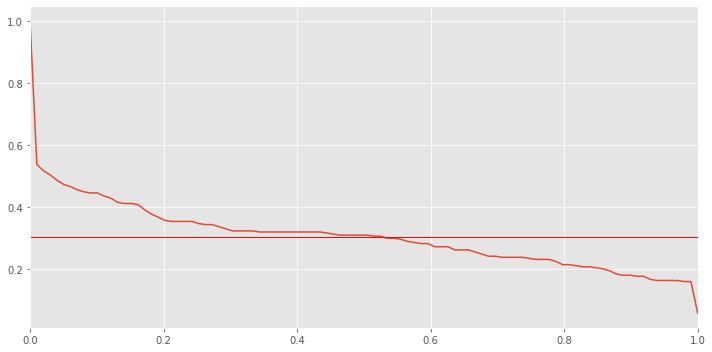


Done!


In [13]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 100)), success_rates)
plt.axhline(Base_final['y_binaria'.format].sum() / 294, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')

In [14]:
suma_correct = 0
suma_y_1 = 0
threshold = .55
for i in range(294):
    true_y = Base_final['y_binaria'][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct +=1
    suma_y_1 += y_hat
print('Fitness:', suma_correct/294)
print(Base_final['y_binaria'].sum())
print(suma_y_1)

Fitness: 0.9421768707482994
89
88


## 3) PEA 

In [15]:
df=Base_final

### *1-.Promediar x*

In [16]:
media_Deuda = df['Deuda'].mean()
print (media_Deuda)

50.85168879787015


In [17]:
media_Inf = df['Inflacion'].mean()
print (media_Inf)

5.644939619508486


In [18]:
media_GP = df['Gasto público'].mean()
print (media_GP)

21.875635911947423


In [19]:
media_TF = df['Tasa fiscal'].mean()
print (media_TF)

16.12762861585376


In [20]:
media_Reservas = df['Reservas'].mean()
print (media_Reservas)

44401321668.920425


In [21]:
media_TC = df['Tipo de cambio'].mean()
print (media_TC)

19.567440731381136


### *Otro metodo de sacar los promedios*

In [22]:
promedio_deuda = df['Deuda'].sum() / len(df)
promedio_inflacion = df['Inflacion'].sum() / len(df)
promedio_GP = df['Gasto público'].sum() / len(df)
promedio_TF = df['Tasa fiscal'].sum() / len(df)
promedio_Reservas = df['Reservas'].sum() / len(df)
promedio_TC = df['Tipo de cambio'].sum() / len(df)

In [23]:
results = model

In [24]:
dir(results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_endog_name',
 '_get_robustcov_results',
 'aic',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'f_test',
 'fittedvalues',
 'get_margeff',
 'initialize',
 'k_constant',
 'llf',
 'llnull',
 'llr',
 'llr_pvalue',
 'load',
 'mle_retvals',
 'mle_settings',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'pred_table',
 'predict',
 'prsquared',
 'pvalues',
 'remove_data',
 'resid_dev',
 'resid_generalized',
 'resid_pearson',
 'resid_response',
 'save',
 'scale',
 'set_null_options',
 'summary',
 'summary2',
 't_test',
 't_

In [25]:
results.params

const            -9.755437e+00
Deuda             9.859366e-02
Inflacion         2.780588e-01
Reservas          1.346530e-11
Gasto público     3.859946e-01
Tasa fiscal      -2.242281e-01
Tipo de cambio   -3.445464e-01
Australia        -1.382131e+01
Bhutan            9.714359e+00
Guatemala         7.765073e+00
Iceland           1.635271e+01
India             5.833430e+00
Jamaica           3.859249e+01
Jordan            3.043443e+01
Mauritius         7.924271e+00
Singapore        -3.954517e+01
Switzerland      -1.543219e+01
Thailand          1.392814e+01
Tunisia          -2.990541e+00
United Kingdom   -3.466379e+01
United States    -3.386925e+01
dtype: float64

In [27]:
df_betas =pd.DataFrame(results.params)

In [28]:
df_betas.loc['const']

0   -9.755437
Name: const, dtype: float64

In [31]:
def sigmoide_G(x):
    rv = 1 / (1 + np.exp(-x)) 
    return rv

### PEA Deuda

In [32]:
cambio_deuda= .25

In [33]:
(sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Deuda']))*cambio_deuda

0    0.000274
dtype: float64

### PEA Gasto público

In [34]:
cambio_Gp = 0.6

In [35]:
(sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Gasto público']))*cambio_Gp

0    0.002573
dtype: float64

### PEA Inflación

In [36]:
cambio_Inf = 0.99

In [37]:
(sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Inflacion']))*cambio_Inf

0    0.003059
dtype: float64

### PEA Tasa fiscal

In [38]:
cambio_TF = 0.6

In [39]:
(sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Tasa fiscal']))*cambio_TF

0   -0.001495
dtype: float64

### PEA Tipo de cambio

In [40]:
cambio_TC = 0.45

In [41]:
(sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Tipo de cambio']))*cambio_TC

0   -0.001723
dtype: float64

### PEA Reservas

In [50]:
cambio_reservas = 0.90

In [51]:
 (sigmoide_G(df_betas.loc['const'] + df_betas.loc['Deuda']*promedio_deuda+ df_betas.loc['Inflacion']*promedio_inflacion + df_betas.loc['Gasto público']*promedio_GP + df_betas.loc['Tasa fiscal']*promedio_TF + df_betas.loc['Tipo de cambio']* promedio_TC + df_betas.loc['Reservas'] * promedio_Reservas)*(df_betas.loc['Reservas']))*cambio_reservas

0    1.346629e-13
dtype: float64

In [42]:
print(model.get_margeff(at = 'mean').summary())

        Logit Marginal Effects       
Dep. Variable:              y_binaria
Method:                          dydx
At:                              mean
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Deuda              0.0005    711.106   7.66e-07      1.000   -1393.741    1393.742
Inflacion          0.0015   2005.496   7.66e-07      1.000   -3930.699    3930.702
Reservas        7.442e-14   9.71e-08   7.66e-07      1.000    -1.9e-07     1.9e-07
Gasto público      0.0021   2783.983   7.66e-07      1.000   -5456.504    5456.508
Tasa fiscal       -0.0012   1617.243  -7.66e-07      1.000   -3169.740    3169.737
Tipo de cambio    -0.0019   2485.038  -7.66e-07      1.000   -4870.587    4870.583
Australia         -0.0764   6180.379  -1.24e-05      1.000   -1.21e+04    1.21e+04
Bhutan             0.0537        nan        nan        nan         nan         nan
Guatemala         

/Users/carolinasanchez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_margins.py:343: RuntimeWarning: invalid value encountered in sqrt
  return cov_me, np.sqrt(np.diag(cov_me))


## 4) APE

In [43]:
print ('APE',model.get_margeff().summary())

APE         Logit Marginal Effects       
Dep. Variable:              y_binaria
Method:                          dydx
At:                           overall
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Deuda              0.0051      0.002      2.697      0.007       0.001       0.009
Inflacion          0.0144      0.006      2.422      0.015       0.003       0.026
Reservas        6.956e-13   5.14e-13      1.352      0.176   -3.13e-13     1.7e-12
Gasto público      0.0199      0.007      2.878      0.004       0.006       0.034
Tasa fiscal       -0.0116      0.011     -1.017      0.309      -0.034       0.011
Tipo de cambio    -0.0178      0.003     -5.584      0.000      -0.024      -0.012
Australia         -0.7140        nan        nan        nan         nan         nan
Bhutan             0.5019        nan        nan        nan         nan         nan
Guatemala     